                               Region                Country        Item Type  \
0               Australia and Oceania                 Tuvalu        Baby Food   
1   Central America and the Caribbean                Grenada           Cereal   
2                              Europe                 Russia  Office Supplies   
3                  Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                  Sub-Saharan Africa                 Rwanda  Office Supplies   
..                                ...                    ...              ...   
95                 Sub-Saharan Africa                   Mali          Clothes   
96                               Asia               Malaysia           Fruits   
97                 Sub-Saharan Africa           Sierra Leone       Vegetables   
98                      North America                 Mexico    Personal Care   
99                 Sub-Saharan Africa             Mozambique        Household   

   Sales Channel Order Prio

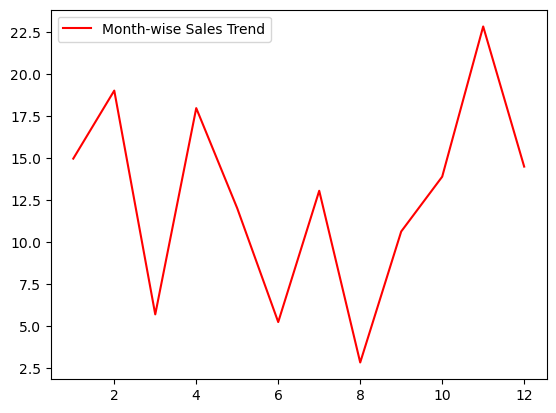

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

dataframe = pd.read_csv('P1 Amazon Sales data.csv')
print(dataframe)

dataframe['month']= pd.DatetimeIndex(dataframe['Order Date']).month

top5bymonth=dataframe.groupby('month')['Total Revenue'].mean().reset_index()
print(top5bymonth)
month=top5bymonth['month']
revenue=top5bymonth['Total Revenue']/100000

plt.plot(month,revenue,color="red",label="Month-wise Sales Trend")
plt.legend()
plt.show()


   year  Total Revenue
0  2010   1.918602e+06
1  2011   9.274305e+05
2  2012   1.449938e+06
3  2013   1.694204e+06
4  2014   1.108681e+06
5  2015   1.129817e+06
6  2016   1.237287e+06
7  2017   1.671677e+06


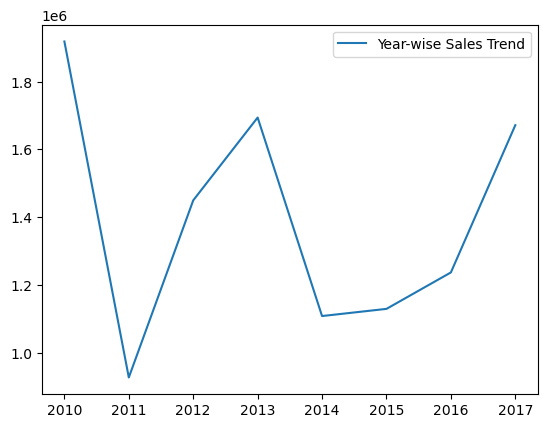

In [10]:
dataframe['year']= pd.DatetimeIndex(dataframe['Order Date']).year

top5byyear=dataframe.groupby('year')['Total Revenue'].mean().reset_index()
print(top5byyear)
year=top5byyear['year']
revenue=top5byyear['Total Revenue']
plt.plot(year,revenue,label="Year-wise Sales Trend")
plt.legend()
plt.show()

   YearMonth  Total Revenue
0    2010-02   1.705331e+06
1    2010-05   1.293987e+06
2    2010-06   1.082418e+06
3    2010-10   3.032467e+06
4    2010-11   3.458252e+06
5    2010-12   1.290893e+06
6    2011-01   5.211127e+05
7    2011-02   3.870022e+05
8    2011-04   2.798046e+06
9    2011-05   2.724105e+05
10   2011-06   1.910344e+04
11   2011-07   9.704064e+04
12   2011-09   5.749519e+05
13   2011-11   1.484596e+06
14   2012-01   5.064420e+05
15   2012-02   2.235950e+06
16   2012-03   9.947654e+05
17   2012-04   1.518671e+06
18   2012-05   1.891391e+06
19   2012-06   7.106918e+05
20   2012-07   1.481698e+06
21   2012-08   5.767828e+05
22   2012-09   2.324076e+06
23   2012-10   1.521123e+06
24   2013-02   3.296425e+06
25   2013-03   8.357591e+05
26   2013-04   3.262562e+06
27   2013-06   6.764337e+05
28   2013-07   4.272756e+06
29   2013-08   8.962398e+04
30   2013-09   7.125321e+04
31   2013-10   1.351385e+06
32   2013-12   1.736762e+05
33   2014-02   9.098301e+05
34   2014-04   2.255

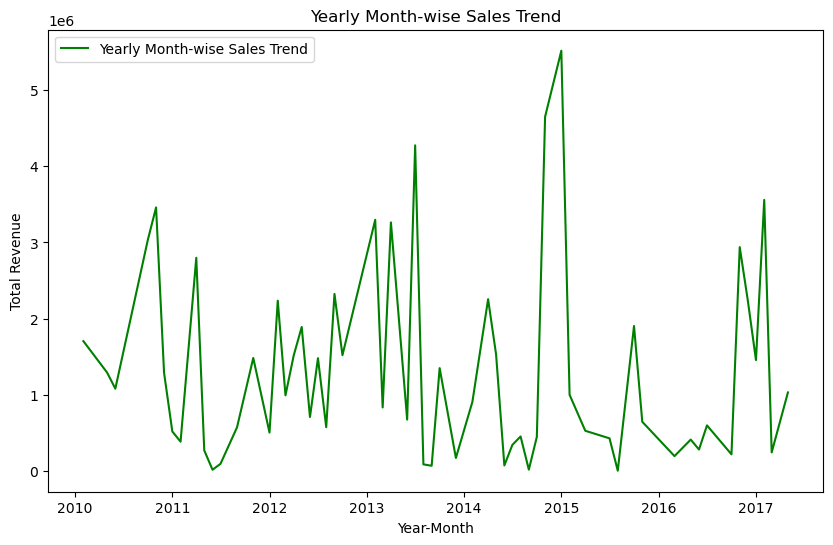

In [16]:
dataframe['Order Date'] = pd.to_datetime(dataframe['Order Date'])

# Create 'YearMonth' column
dataframe['YearMonth'] = dataframe['Order Date'].dt.to_period('M')

# Group by 'YearMonth' and calculate the mean 'Total Revenue'
top5_by_yearmonth = dataframe.groupby('YearMonth')['Total Revenue'].mean().reset_index()
print(top5_by_yearmonth)

# Convert 'YearMonth' back to datetime for plotting
top5_by_yearmonth['YearMonth'] = top5_by_yearmonth['YearMonth'].dt.to_timestamp()

# Extract 'YearMonth' and 'Total Revenue' for plotting
year_month = top5_by_yearmonth['YearMonth'].values
revenue = top5_by_yearmonth['Total Revenue'].values

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(year_month, revenue, color="green", label="Yearly Month-wise Sales Trend")
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.title('Yearly Month-wise Sales Trend')
plt.legend()
plt.show()


          Item Type  Total Revenue
0         Baby Food   1.478618e+06
1         Beverages   3.363493e+05
2            Cereal   7.604141e+05
3           Clothes   5.990225e+05
4         Cosmetics   2.815501e+06
5            Fruits   4.664813e+04
6         Household   3.321079e+06
7              Meat   2.251838e+06
8   Office Supplies   2.548782e+06
9     Personal Care   3.980905e+05
10           Snacks   6.935778e+05
11       Vegetables   5.148428e+05
          Item Type    Total Cost
0         Baby Food  9.233834e+05
1         Beverages  2.253434e+05
2            Cereal  4.329222e+05
3           Clothes  1.964583e+05
4         Cosmetics  1.695805e+06
5            Fruits  3.459862e+04
6         Household  2.497456e+06
7              Meat  1.946533e+06
8   Office Supplies  2.054650e+06
9     Personal Care  2.760282e+05
10           Snacks  4.429298e+05
11       Vegetables  3.038729e+05


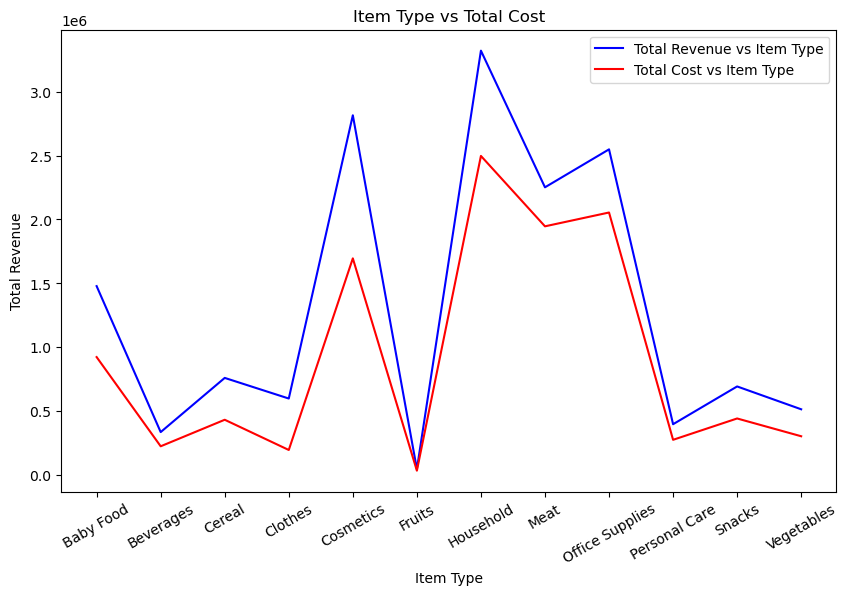

In [18]:

revenue_item = dataframe.groupby('Item Type')['Total Revenue'].mean().reset_index()
print(revenue_item)

cost_item = dataframe.groupby('Item Type')['Total Cost'].mean().reset_index()
print(cost_item)

label1= revenue_item['Total Revenue'].values
label2= cost_item['Total Cost'].values
item = revenue_item['Item Type']

plt.figure(figsize=(10, 6))
plt.plot(item,label1,color="blue", label="Total Revenue vs Item Type")
plt.plot(item,label2,color="red", label="Total Cost vs Item Type")
plt.xlabel('Item Type')
plt.xticks(rotation=30)
plt.ylabel('Total Revenue')
plt.title('Item Type vs Total Revenue')
plt.title('Item Type vs Total Cost')
plt.legend()
plt.show()





          Item Type  Total Profit
0         Baby Food    3886643.70
1         Beverages     888047.28
2            Cereal    2292443.43
3           Clothes    5233334.40
4         Cosmetics   14556048.66
5            Fruits     120495.18
6         Household    7412605.71
7              Meat     610610.00
8   Office Supplies    5929583.75
9     Personal Care    1220622.48
10           Snacks     751944.18
11       Vegetables    1265819.63


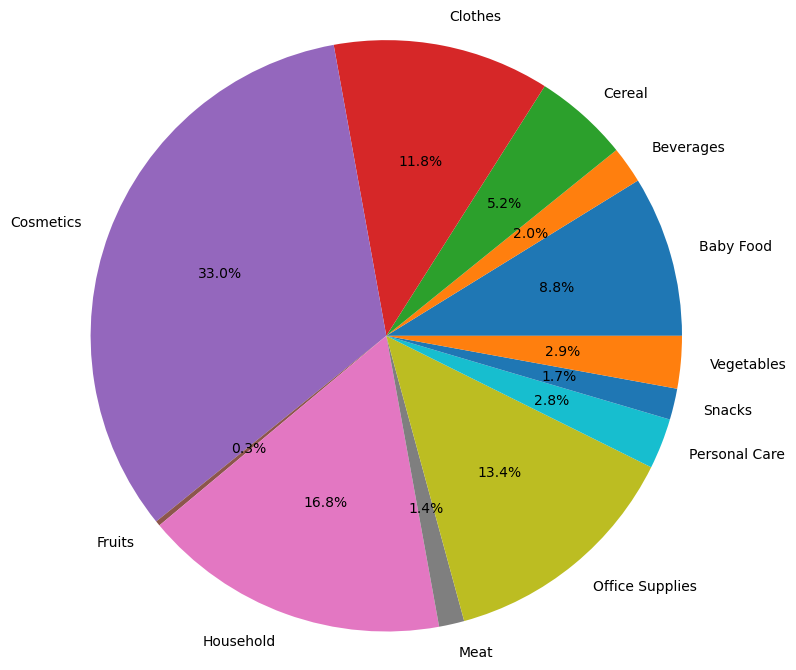

In [34]:
item_profit= dataframe.groupby('Item Type')['Total Profit'].sum().reset_index()
print(item_profit)
value= item_profit['Total Profit']
label= item_profit['Item Type']
plt.pie(value,labels= label, autopct='%0.1f%%', radius=2)
plt.show()


                              Region  Total Profit
0                               Asia    6113845.87
1              Australia and Oceania    4722160.03
2  Central America and the Caribbean    2846907.85
3                             Europe   11082938.63
4       Middle East and North Africa    5761191.86
5                      North America    1457942.76
6                 Sub-Saharan Africa   12183211.40


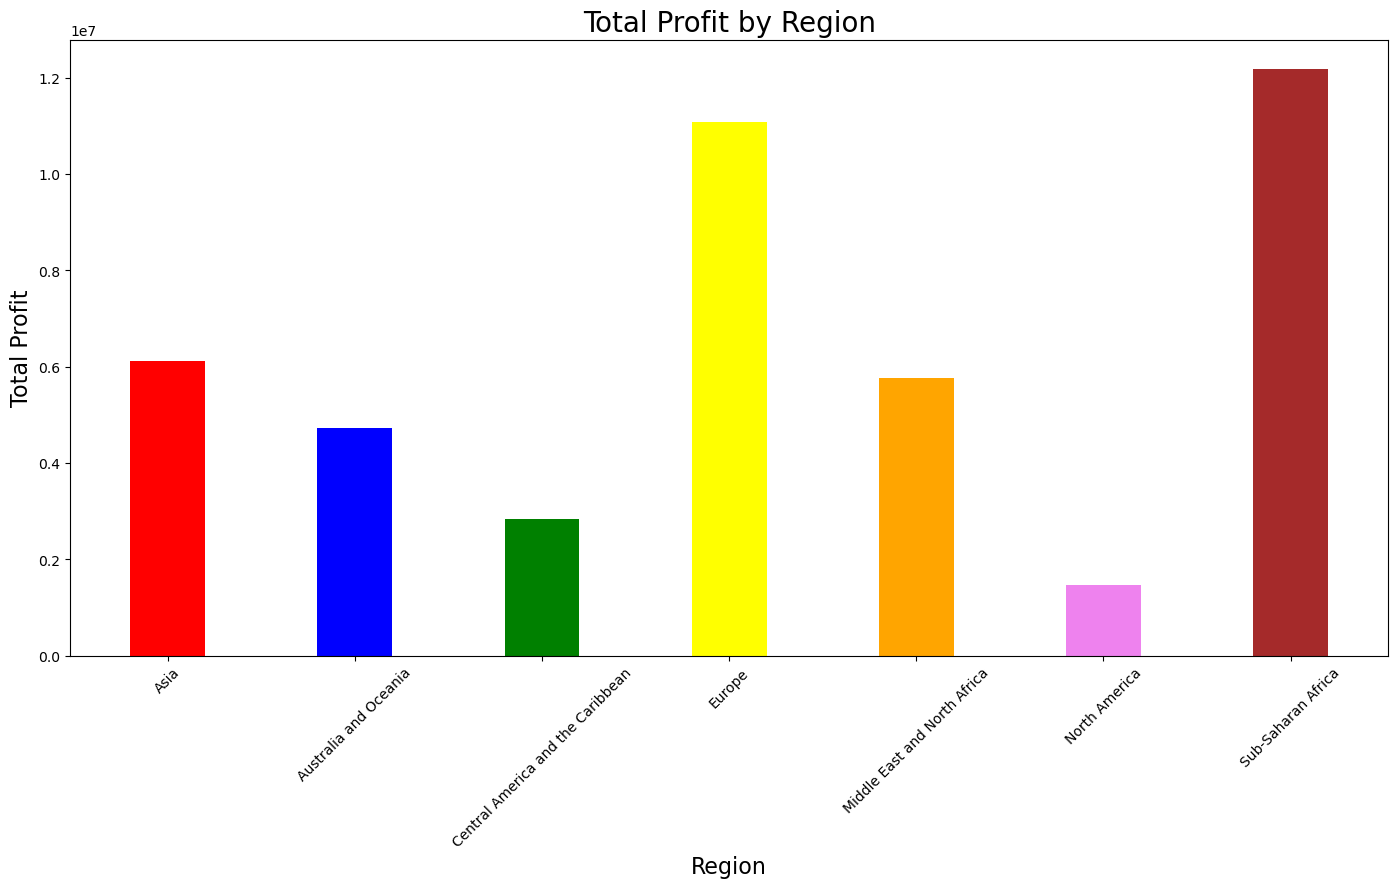

In [48]:
Region_profit= dataframe.groupby('Region')['Total Profit'].sum().reset_index()
print(Region_profit)
fig=plt.subplots(figsize=(17,8))
plt.title("Total Profit by Region",fontsize=20)
plt.xlabel("Region",fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Total Profit", fontsize=16)

label=Region_profit['Region']
value=Region_profit['Total Profit']
plt.bar(label, value, width=0.4, color=('red','blue','green','yellow','orange','violet','brown'))
plt.show()



  Sales Channel  Units Sold
0       Offline      276782
1        Online      236089


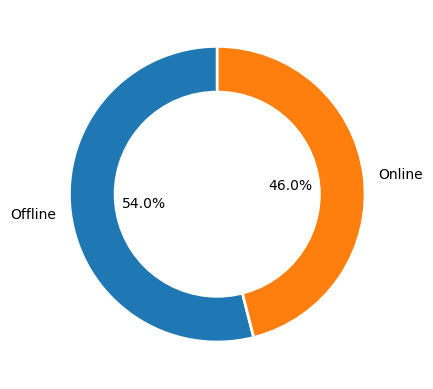

In [92]:
grp_channel = dataframe.groupby('Sales Channel')['Units Sold'].sum().reset_index()
print(grp_channel)
value=grp_channel['Sales Channel']
label = grp_channel['Units Sold']

plt.pie(label, labels=value, autopct='%1.1f%%',startangle=90, wedgeprops={'linewidth': 2, 'edgecolor': 'white'},pctdistance=0.5, labeldistance=1.1)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()
                                                        